In [1517]:
import requests
import zipfile
import os

In [1518]:
"""
# This process of downloading the images might take up to a minute

url = "https://www.kaggle.com/api/v1/datasets/download/abhranta/brain-tumor-detection-mri"

# Get the current directory
current_directory = os.getcwd()

# Define the output file path and extraction folder
output_file = os.path.join(current_directory, "brain-tumor-mri-dataset.zip")
extract_to = os.path.join(current_directory, "brain-tumor-mri-dataset")

# Step 1: Download the file
response = requests.get(url, allow_redirects=True)
with open(output_file, "wb") as file:
    file.write(response.content)
    
# Step 2: Unzip the file
if zipfile.is_zipfile(output_file):
    with zipfile.ZipFile(output_file, "r") as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"File unzipped to {extract_to}")
    
    os.remove(output_file)    
    print(f"Deleted the ZIP file: {output_file}")
else:
    print("The downloaded file is not a valid zip file.")
    
"""

'\n# This process of downloading the images might take up to a minute\n\nurl = "https://www.kaggle.com/api/v1/datasets/download/abhranta/brain-tumor-detection-mri"\n\n# Get the current directory\ncurrent_directory = os.getcwd()\n\n# Define the output file path and extraction folder\noutput_file = os.path.join(current_directory, "brain-tumor-mri-dataset.zip")\nextract_to = os.path.join(current_directory, "brain-tumor-mri-dataset")\n\n# Step 1: Download the file\nresponse = requests.get(url, allow_redirects=True)\nwith open(output_file, "wb") as file:\n    file.write(response.content)\n    \n# Step 2: Unzip the file\nif zipfile.is_zipfile(output_file):\n    with zipfile.ZipFile(output_file, "r") as zip_ref:\n        zip_ref.extractall(extract_to)\n    print(f"File unzipped to {extract_to}")\n    \n    os.remove(output_file)    \n    print(f"Deleted the ZIP file: {output_file}")\nelse:\n    print("The downloaded file is not a valid zip file.")\n    \n'

In [1519]:
import numpy as np
import matplotlib.pyplot as plt
import math
import shutil
import glob

In [1520]:
# Define the root directory of your new dataset
ROOT_DIR = os.path.join(current_directory, "brain-tumor-mri-dataset", "Brain_Tumor_Detection")

# Dictionary to hold the number of images for each class
number_of_images = {}

# We'll only count the 'yes' and 'no' folders
classes_to_count = ["yes", "no"]

# Loop through the directories in the root
for dir_name in os.listdir(ROOT_DIR):
    dir_path = os.path.join(ROOT_DIR, dir_name)
    
    # Only process if it's one of the classes_to_count
    if dir_name in classes_to_count and os.path.isdir(dir_path):
        # Count how many images are in this directory
        number_of_images[dir_name] = len([
            f for f in os.listdir(dir_path)
            if os.path.isfile(os.path.join(dir_path, f))
        ])

# Print the results
for class_name, count in number_of_images.items():
    print(f"Class '{class_name}' contains {count} images.")



Class 'no' contains 326 images.
Class 'yes' contains 326 images.


### Dataset Splitting Strategy

The dataset will be divided into three parts:

1. **Training Data (70%)**: Used to train the model and learn patterns.
2. **Validation Data (15%)**: Used during training for hyperparameter tuning and performance checks.
3. **Test Data (15%)**: Used for evaluating the final model on unseen data.

### Summary

| Split         | Percentage | Purpose                              |
|---------------|------------|--------------------------------------|
| **Training**  | 70%        | Learn patterns and train the model. |
| **Validation**| 15%        | Tune hyperparameters and avoid overfitting. |
| **Testing**   | 15%        | Evaluate the model on unseen data.  |

### Directory Structure
```
split_dataset/
├── train/
│   ├── Tumor/
│   └── Normal/
├── val/
│   ├── Tumor/
│   └── Normal/
├── test/
│   ├── Tumor/
│   └── Normal/
```


In [1521]:
Training_Data_Percent = 0.7
Validation_Data_Percent = 0.15
Testing_Data_Percent = 0.15

In [1522]:
def dataFolder(p, split):
    """
    p: Name of the split folder (e.g., "train", "val", "test").
    split: Fraction of images to copy from each class folder (0 < split <= 1).
    """
    # Target directory, e.g. "split_dataset/train"
    target_dir = os.path.join("split_dataset", p)  

    # 1) Create target_dir if it doesn't already exist
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

        # 2) Create folders for "yes" and "no" within target_dir
        yes_dir = os.path.join(target_dir, "yes")
        no_dir = os.path.join(target_dir, "no")
        os.makedirs(yes_dir, exist_ok=True)
        os.makedirs(no_dir, exist_ok=True)

        # 3) Loop over subdirectories (yes, no, pred) in ROOT_DIR
        for dir_name in os.listdir(ROOT_DIR):
            dir_path = os.path.join(ROOT_DIR, dir_name)

            # We only want to process the yes/no directories, skipping pred
            if os.path.isdir(dir_path):
                if dir_name == "yes":
                    # Gather all images in the "yes" folder
                    images = os.listdir(dir_path)
                    # Number of images to move
                    num_images = min(len(images), math.floor(split * len(images)))
                    # Randomly pick which images to move
                    selected_images = np.random.choice(images, size=num_images, replace=False)

                    # Copy then remove them from the original folder
                    for img in selected_images:
                        src = os.path.join(dir_path, img)
                        dst = os.path.join(yes_dir, img)
                        shutil.copy(src, dst)
                        os.remove(src)

                elif dir_name == "no":
                    # Gather all images in the "no" folder
                    images = os.listdir(dir_path)
                    num_images = min(len(images), math.floor(split * len(images)))
                    selected_images = np.random.choice(images, size=num_images, replace=False)

                    for img in selected_images:
                        src = os.path.join(dir_path, img)
                        dst = os.path.join(no_dir, img)
                        shutil.copy(src, dst)
                        os.remove(src)

        print(f"Dataset split into '{p}' folder successfully.")

    else:
        print(f"The '{p}' folder already exists. No changes made.")

In [1523]:
dataFolder("train",Training_Data_Percent)

The 'train' folder already exists. No changes made.


In [1524]:
dataFolder("val",Validation_Data_Percent)

The 'val' folder already exists. No changes made.


In [1525]:
dataFolder("test",Testing_Data_Percent)

The 'test' folder already exists. No changes made.


### Model Build

In [1526]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras

In [1527]:
#CNN Model

model = Sequential()

# Layers
model.add(Conv2D(filters=16, kernel_size= (3,3), activation="relu", input_shape = (224,224,3)))

model.add(Conv2D(filters=36, kernel_size= (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2))) #Prevent overfitting

model.add(Conv2D(filters=64, kernel_size= (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2))) #Prevent overfitting

model.add(Conv2D(filters=128, kernel_size= (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2))) #Prevent overfitting

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation="relu"))  
model.add(Dropout(rate=0.25))  # Dropout to prevent overfitting
model.add(Dense(units=1, activation="sigmoid"))  


model.summary()



/Users/nestorxx-xx/Library/Mobile Documents/com~apple~CloudDocs/CODE/Visual Studio/MRI_Tumor_Detection/myenv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_202 (Conv2D)             │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_203 (Conv2D)             │ (None, 220, 220, 36)   │         5,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_151               │ (None, 110, 110, 36)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_204 (Conv2D)             │ (None, 108, 108, 64)   │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_152               │ (None, 54, 54, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_205 (Conv2D)             │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_153               │ (None, 26, 26, 128)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_99 (Dropout)            │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_92 (Flatten)            │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_139 (Dense)               │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_100 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_140 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [1528]:
# Compile

model.compile(optimizer="adam", loss= keras.losses.binary_crossentropy, metrics=["accuracy"])

### Preparing our data using data generator

In [1529]:

from keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [1530]:
def preprocessingImages(path, type):
    """
    Input: Path
    Output: Preprocessed images using ImageDataGenerator
    """
    if type == "train":
        image_data = ImageDataGenerator(
            zoom_range=0.2,
            shear_range=0.2,
            preprocessing_function= preprocess_input,
            horizontal_flip=True,
        )
    else:
        # Only preprocess validation/testing data
        image_data = ImageDataGenerator(
            preprocessing_function= preprocess_input
        )
    
    # Ensure images are resized to 224x224
    image = image_data.flow_from_directory(
        directory=path,
        target_size=(224, 224),  # Matches model input size
        batch_size=32,
        class_mode="binary"  # Must match the type of classification
    )
    
    return image


In [1531]:
train_data = preprocessingImages("split_dataset/train", "train")

Found 2100 images belonging to 2 classes.


In [1532]:
train_data.class_indices

{'no': 0, 'yes': 1}

In [1533]:
test_data = preprocessingImages("split_dataset/test", "test")

Found 114 images belonging to 2 classes.


In [1534]:
val_data = preprocessingImages("split_dataset/val", "val")

Found 134 images belonging to 2 classes.


In [1535]:
# Call Back

from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=3, verbose=1, mode= "auto")

mc = ModelCheckpoint(monitor="val_accuracy",filepath="bestmodel.keras", verbose=1, save_best_only=True, mode="auto")

cb = [es,mc]

### Model Trainig 

In [1536]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet, preprocess_input

In [1537]:
base_model = MobileNet(input_shape= (224,224,3), include_top=False)

In [1539]:
for layer in base_model.layers:
    layer.trainable = False

In [1538]:
X = Flatten()(base_model.output)
X = Dense(units=1, activation="sigmoid")(X)

model = Model(base_model.input, X)

In [1543]:
model.compile(optimizer="rmsprop", 
            loss=keras.losses.binary_crossentropy, 
            metrics=["accuracy"])

In [1545]:
hist = model.fit(
        train_data, 
        steps_per_epoch=8, 
        epochs=30, 
        validation_data=val_data, 
        validation_steps=16, 
        callbacks=cb
    )

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.9757 - loss: 0.0757
Epoch 1: val_accuracy did not improve from 0.97015
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 263ms/step - accuracy: 0.9757 - loss: 0.0794 - val_accuracy: 0.9104 - val_loss: 0.5586
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.7121 - loss: 3.8431
Epoch 2: val_accuracy did not improve from 0.97015
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step - accuracy: 0.7228 - loss: 3.7080 - val_accuracy: 0.9552 - val_loss: 0.1559
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9667 - loss: 0.1672
Epoch 3: val_accuracy did not improve from 0.97015
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 223ms/step - accuracy: 0.9647 - loss: 0.1794 - val_accuracy: 0.8881 - val_loss: 0.5044
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.9703 - loss: 0.1160
Epoch 4: val_accuracy improved from 0.97015 to 0.97761, saving model to bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 221ms/step - accuracy: 0.9705 - loss: 0.1159 - val

In [1548]:
# Load the best fit model

model = load_model("bestmodel.keras")

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_data)

print(f"Our model accuracy is {accuracy*100:.2f} %")
print(f"Our model loss is {loss:.4f}")  

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.9850 - loss: 0.0477
Our model accuracy is 99.12 %
Our model loss is 0.0288


In [1549]:
h = hist.history

h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

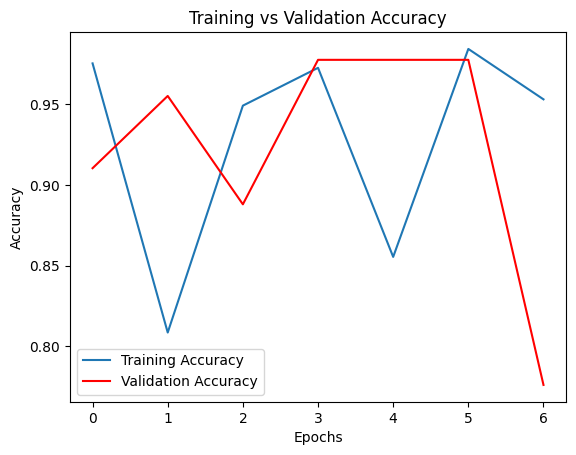

In [1550]:
plt.plot(h["accuracy"], label="Training Accuracy")
plt.plot(h["val_accuracy"], label="Validation Accuracy", color="red")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

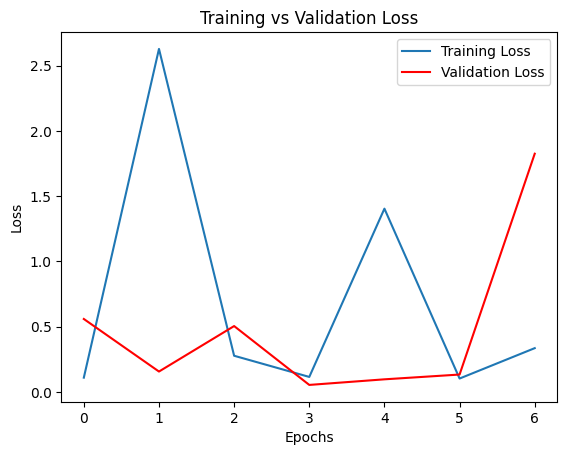

In [1551]:
plt.plot(h["loss"], label="Training Loss")  
plt.plot(h["val_loss"], label="Validation Loss", color="red")  
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss") 
plt.legend()
plt.show()


In [1616]:
def get_prediction(path):
    img = image.load_img(path, target_size=(224, 224))

    input_arr = img_to_array(img)
    input_arr = np.expand_dims(input_arr, axis=0)
    input_arr = input_arr / 255.0

    # Predict with the model
    prob = model.predict(input_arr)[0][0]  # extract scalar float
    # If prob >= 0.5 => class 1 (tumor), else class 0 (healthy)
    pred = 1 if prob >= 0.5 else 0
    return pred

def predict_img(path):

    # Predict with the model
    pred = get_prediction(path)

    if pred == 0:
        print("The MRI image is of a HEALTHY BRAIN")
    else:
        print("The MRI image indicates a TUMOR")
        
        # Display the input image
    plt.imshow(input_arr[0])
    plt.title("input image")
    plt.show()


In [1617]:
import os

def evaluate_folder(folder, type):
    image_paths = [
        os.path.join(folder, f) 
        for f in os.listdir(folder)
        if f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ]
    h = 1
    type_txt = "TUMOR"
    if type == "no":
        type_txt = "HEALTHY"
        h= 0
    total = 0
    correct = 0
    misclassified = []

    for img_path in image_paths:
        pred = get_prediction(img_path)  # 0 or 1

        total += 1
        if pred == h:
            correct += 1
        else:
            misclassified.append(img_path)

    success_percentage = (correct / total) * 100
    print(f"\nTotal images in '{type}' folder: {total}")
    print(f"Correctly predicted as {type_txt}: {correct}")
    print(f"Success percentage: {success_percentage:.2f}%")

In [1618]:
# Go through the yes folder and check

yes_folder = "brain-tumor-mri-dataset/Brain_Tumor_Detection/yes"
evaluate_folder(yes_folder, "yes")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

In [1619]:
# Go through the no folder and check

no_folder = "brain-tumor-mri-dataset/Brain_Tumor_Detection/no"
evaluate_folder(no_folder, "no")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━